In [1]:
import tweepy
import nltk
nltk.download('vader_lexicon')
from nltk import word_tokenize, WordPunctTokenizer, RegexpTokenizer, TweetTokenizer
nltk.download('punkt')
import json
import pandas as pd
import collections
from collections import Counter
import itertools
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
import networkx as nx
from textblob import TextBlob
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

!pip3 install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import random
import string

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 125 kB 4.7 MB/s 


In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [10]:
def load_json(path: str):
  with open(path, "r") as F:
    return json.load(F)

In [9]:
all_tweets: list = load_json("tweets.json")

In [20]:
tweets = [tweet for tweet in all_tweets if tweet["retweeted"] == False]
tweets

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Thu Mar 17 17:45:17 +0000 2022',
  'entities': {'hashtags': [{'indices': [54, 65], 'text': 'SackSarver'}],
   'media': [{'display_url': 'pic.twitter.com/Q4c87EmXvl',
     'expanded_url': 'https://twitter.com/ASAP__Sports/status/1504514220024549382/photo/1',
     'id': 1504514177574002688,
     'id_str': '1504514177574002688',
     'indices': [96, 119],
     'media_url': 'http://pbs.twimg.com/media/FOEbrFnWYAA5m9k.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/FOEbrFnWYAA5m9k.jpg',
     'sizes': {'large': {'h': 675, 'resize': 'fit', 'w': 1200},
      'medium': {'h': 675, 'resize': 'fit', 'w': 1200},
      'small': {'h': 383, 'resize': 'fit', 'w': 680},
      'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
     'type': 'photo',
     'url': 'https://t.co/Q4c87EmXvl'}],
   'symbols': [],
   'urls': [{'display_url': '…ericansportsaccountabilityproject.com',
     'expanded_url': 'https://americansportsaccountabilit

In [27]:
def filter_noise_hashexc(tweet_text: str):
  rem_mentions = re.sub(r'@[^ ]+', '', tweet_text)
  rem_links = re.sub(r'https?://[^ ]+', '', rem_mentions)
  rem_emojis = re.compile("[" 
        u"\U0001F600-\U0001F64F" # emoticons
        u"\U0001F300-\U0001F5FF" # symbols & pictographs
        u"\U0001F680-\U0001F6FF" # transport & map symbols
        u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           "]+", 
        flags=re.UNICODE).sub("", rem_links)
  rem_punct = re.sub(r'[^\w\s]', '', rem_emojis)
  return rem_punct

In [28]:
def filter_noise(tweet):
  tweet = filter_noise_hashexc(tweet["text"])
  return re.sub(r"(^|\B)#(?![0-9_]+\b)([a-zA-Z0-9_]{1,30})(\b|\r)", "", tweet)


In [29]:
filtered_tweets = [filter_noise(tweet) for tweet in tweets]
filtered_tweets

['Enough Said\n \nSign the letter calling on the  to SackSarver here  ',
 'Bro almost all the  superstars didnt play or not go play in Atlanta ',
 'Last night on Buzzer\n\nFootage via  ',
 'LusiaHarris only woman drafted by  team dies\nLusia Harris was inducted into the basketball Hall of Fame i ',
 'The  needs a True Great White American player I love the euro guys but the league needs a Larry Bird of this era',
 'Shit like this is another reason why we gotta make the playoffs an open tourney \n\nImagine if we got these two team ',
 'Just cancel the season ',
 'Luka Doncic reads and patience off the dribble  37 points 9 assists 9 rebounds   ',
 'Man the  has such beautiful ladies working for them   Got the biggest crushes on   and ',
 'When Brittney Griner gets free I hope she dont do a interview with anyone Cause of course you already know folks ',
 'Had so much fun unboxing this package from Google teampixel giftfromgoogle  ',
 'New Jersey in poverty and has no  no  and no  and   do

In [36]:
tweet_with_person = []


for tweet in all_tweets:
  if len(tweet["entities"]["user_mentions"]):
    filtered = filter_noise(tweet)
    tweet_with_person.append(filtered)

tweet_with_person.sort(key= lambda x: TextBlob(x).sentiment.polarity)
tweet_with_person


['The fact that the  and  refuse to speak about BrittneyGriner is disgusting',
 'Can we be  Wests WORST LakeShow BEEN canceled smh ',
 'The NBA may be the worst league in the world ',
 'nigga Steph going outs like the anti christ coming to earth to put Jesus in the angle lock this timeline is TERRIBLE ',
 'Nba Courtview is so horrible ',
 'Have a look at this trash  fan worst fan base in the   \n\n  ',
 'I hate what the  has turned into  You cant even show emotion without getting techd up as if sports arent s ',
 'Ive said it before and Ill say it again the  has the worst refs in pro sports  ',
 'At this point the  are disrespecting the game of Basketball pathetic frustration ',
 'I swear the  refs  be trying to steer the game away from the  HORRIBLE SeeRed BullsNation ',
 'I hope these refs for the Kings vs Bucks game get the worst 2 minute report ever This is so bad No lie  ',
 'Hey  and  why cant I watch games with my NBA League Pass subscription on my latemodel very expensive ',
 '

In [38]:
# zadatak 4
random_tweets = random.choices(all_tweets, k=50)

filtered_tweets = [filter_noise(tweet) for tweet in random_tweets]
filtered_tweets
polarirt = 0
neu_list = []
neg_list = []
pos_list = []

for t in filtered_tweets:
  analysis = TextBlob(t)
  score = SentimentIntensityAnalyzer().polarity_scores(t)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']

  polarity = analysis.sentiment.polarity

  if neg > pos:
    neg_list.append(t)
  elif pos > neg:
    pos_list.append(t)
  elif pos == neg:
    neu_list.append(t)

pos = len(pos_list)/len(filtered_tweets)*100
neg = len(neg_list)/len(filtered_tweets)*100
neu = len(neu_list)/len(filtered_tweets)*100

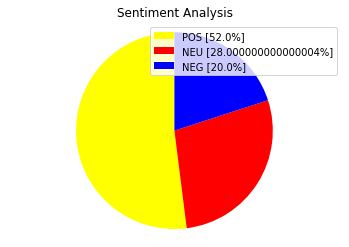

In [39]:
labels = ['POS ['+str(pos)+'%]', 'NEU ['+str(neu)+'%]', 'NEG ['+str(neg)+'%]']
sizes = [pos, neu, neg]
colors = ['yellow', 'red', 'blue']
patches, text = plt.pie(sizes, colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis")
plt.axis('equal')
plt.show()

In [50]:
analyzer = SentimentIntensityAnalyzer()
tweet_sentiment = []

for tweet in filtered_tweets:
  ps = analyzer.polarity_scores(tweet)
  tweet_sentiment.append({"text": tweet, 'çompound': ps['compound']})

tweet_sentiment

[{'text': 'Getting rid of Porzingis is paying off unbelievably for   with the game winning 3 over th ',
  'çompound': 0.5267},
 {'text': 'Hey  why dont u let the guards win dpoy', 'çompound': 0.5859},
 {'text': 'oh nowwwww its an issue \nwhen its the  poster boy \n\nwhere was this energy when dumb ass solomon hill did this ',
  'çompound': -0.6625},
 {'text': 'Wow  Raptors this is terrible   How can you cAll a defensive foul ',
  'çompound': 0.2023},
 {'text': 'Hey  bazley is taking that leap', 'çompound': 0.0},
 {'text': 'Believe formercurrent athlets should build mental health institutes for athletes of all ages help them grow and b ',
  'çompound': 0.4019},
 {'text': 'AllStar Shame on you  ', 'çompound': -0.4767},
 {'text': 'Only a matter of time until China starts doing the same thing Maybe the  will start to realize the error of pa ',
  'çompound': -0.3818},
 {'text': 'Luka v Durant best match up this year NBA Mavs Nets   ',
  'çompound': 0.6369},
 {'text': 'Wait did Charles Barkl

text  çompound
0   Getting rid of Porzingis is paying off unbelie...    0.5267
1             Hey  why dont u let the guards win dpoy    0.5859
2   oh nowwwww its an issue \nwhen its the  poster...   -0.6625
3   Wow  Raptors this is terrible   How can you cA...    0.2023
4                     Hey  bazley is taking that leap    0.0000
5   Believe formercurrent athlets should build men...    0.4019
6                              AllStar Shame on you     -0.4767
7   Only a matter of time until China starts doing...   -0.3818
8   Luka v Durant best match up this year NBA Mavs...    0.6369
9   Wait did Charles Barkley just do a dicksportgo...    0.0000
10  When DeMar has the ball in the post take notes...    0.0000
11  The fact that Im watching Jason Kidd vs Steve ...    0.0000
12  The fact the Celtics dont play at home every S...   -0.6943
13                     \nConfirmed  just hates the      -0.4404
14  The  can be exciting when you have  vs  going ...    0.4939
15  The Free Brittney movement is rising with supp...    0.5574
16  Happy St Patricks Day You know i gotta rock my...    0.2023
17  Fun fact The  have the most OT wins in the  th...    0.8062
18   version of MarchMadness March 17 2022  amp  h...    0.0000
19   do the stevenash on live tv like when he sign...    0.3612
20  Marcus Smart of   plays hard in  but theres a ...    0.3182
21         Ron Harper Jr will be in the  MarchMadness    0.0000
22  What the refs are doing this game is so obviou...    0.1725
23                                   Go Celtic \n \n     0.0000
24  Happy 63rd Birthday to Danny Ainge He did not ...    0.6720
25  If you dont just love this guy as an  star I c...   -0.4310
26  Again you guys  fucking screwed us Allah  does...   -0.8361
27  Devin Booker  has been really efficient 36 pts...    0.4754
28  Hustle is so nonexistent in the  these days th...    0.3612
29  Refer a Friend PLEASE HELP ME GET THIS BONUS  ...    0.9313
30  I get the  and  are conscience about the numbe...    0.4588
31  Posting this because  or  wont post it because...    0.0000
32  Learn Iterate Improve \n\n Managing Director  ...    0.4404
33  Its a travel or a jumpball not too hard  nba c...    0.0762
34                  The Lakers stopped winning games     0.3612
35  Where is the consistency with these  rules and...    0.0000
36                                 Refs are  tonight     0.0000
37  The  needs a True Great White American player ...    0.7227
38  So NBA PLAYERS like   wont talk trash back to ...    0.2220
39                     We need actions to be taken       0.0000
40  Havent been a big Paul George fan since he joi...    0.8151
41  The  could use you in a jersey right now  no cap    -0.2960
42  Im still waiting on      to make a big deal an...    0.0000
43  Dinwiddie with the game winner at his old gym ...    0.5859
44  Getting rid of Porzingis is paying off unbelie...    0.5267
45  I agree with him bc there fans be so damn anno...   -0.8303
46  Put our fuckin boys in the DPOY conversation r...    0.0000
47  Only a matter of time until China starts doing...   -0.3818
48                                          FREE         0.5106
49  Where is the consistency with these  rules and...    0.0000

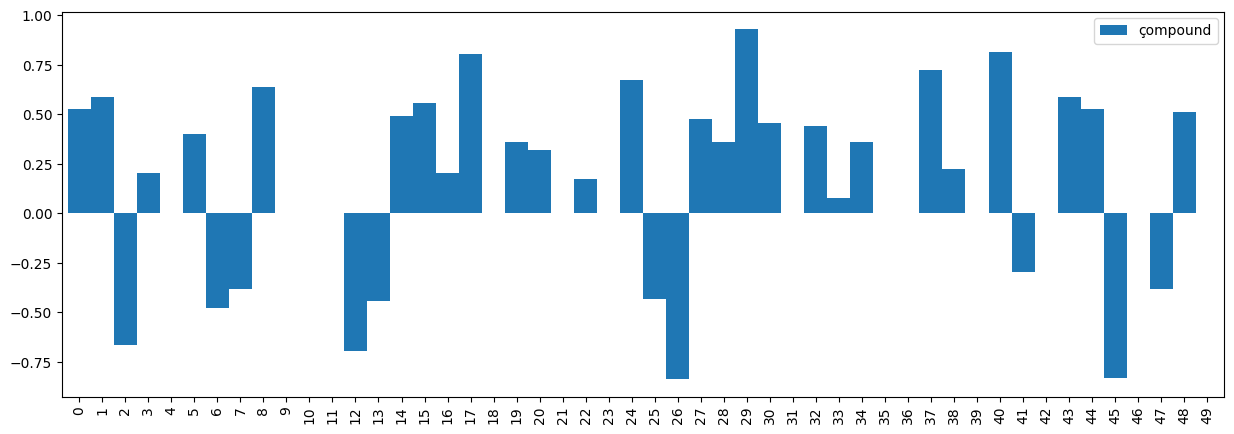

In [51]:
tdf = pd.DataFrame(tweet_sentiment)
tdf.plot.bar(figsize=(15,5), width=1)
tdf

In [40]:
# zadatak 2
nltk.download('maxent_ne_chunker')
nltk.download('words')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [43]:
from nltk.chunk import ne_chunk
from nltk import pos_tag, word_tokenize
from nltk import word_tokenize, WordPunctTokenizer, RegexpTokenizer, TweetTokenizer

tweet_tokenizer = TweetTokenizer()

for t in filtered:
  token = tweet_tokenizer.tokenize(t)
  ne_tree = ne_chunk(pos_tag(token))